# Exporing infanticide and filicide cases in America over the last 30 years

We will analyze data from the FBI Expanded Homicide dataset along with thousands of cases added by the Murder Accountability Project, a nonprofict focused on tracking down unsolved homicides. <br>
<b>Alert</b> Florida and a few other states like Alabama don't have always reported homicide to the Justice Bureau


In [1]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
from IPython.display import display, HTML

In [2]:
# dataset collected by the Murder Accountability Project (MAP) complementing FBI numbers
df = pd.read_csv('SHR76_20.csv', na_values=[999, 'Unknown'])

/Users/pmartisa/.pyenv/versions/3.10.0/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.


In [3]:
df.shape

(827219, 31)

In [4]:
## keeps records for the last 30 years
pd.set_option("display.max_columns", None)
df.columns = df.columns.str.lower().str.replace(" ", "_")
df = df[df.year >= 1990]
df.shape

(551004, 31)

In [5]:
df.head()

,id,cntyfips,ori,state,agency,agentype,source,solved,year,statename,month,incident,actiontype,homicide,situation,vicage,vicsex,vicrace,vicethnic,offage,offsex,offrace,offethnic,weapon,relationship,circumstance,subcircum,viccount,offcount,filedate,msa
37,199010001AL00401,"Autauga, AL",AL00401,Alabama,Prattville,Municipal police,FBI,Yes,1990,NaN,October,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,29.0,Female,Black,Unknown or not reported,17.0,Male,Black,Unknown or not reported,Other or type unknown,Acquaintance,Circumstances undetermined,NaN,0,0,40391.0,"Montgomery, AL"
38,199111001AL00401,"Autauga, AL",AL00401,Alabama,Prattville,Municipal police,FBI,No,1991,NaN,November,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/unknown offender(s),55.0,Female,Black,Unknown or not reported,NaN,NaN,NaN,Unknown or not reported,Other or type unknown,Relationship not determined,Circumstances undetermined,NaN,0,0,12993.0,"Montgomery, AL"
39,199212001AL00400,"Autauga, AL",AL00400,Alabama,Autauga County,Sheriff,FBI,Yes,1992,NaN,December,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,46.0,Female,White,Unknown or not reported,26.0,Male,White,Unknown or not reported,Other or type unknown,Acquaintance,Other arguments,NaN,0,0,43093.0,"Montgomery, AL"
40,199304001AL00400,"Autauga, AL",AL00400,Alabama,Autauga County,Sheriff,FBI,Yes,1993,NaN,April,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,43.0,Male,White,Unknown or not reported,NaN,Female,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Boyfriend,Other arguments,NaN,0,0,51794.0,"Montgomery, AL"
41,199401001AL00401,"Autauga, AL",AL00401,Alabama,Prattville,Municipal police,FBI,Yes,1994,NaN,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,33.0,Male,White,Unknown or not reported,39.0,Male,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Neighbor,Other arguments,NaN,0,0,51095.0,"Montgomery, AL"


In [6]:
# we fix a mistake that we found
df['state'] = df['state']. replace(['PAPSP8','Pennsylvania'])

In [7]:
## we group or data in a way we are able to plot it a see a general trend over time
to_plot = df.groupby(['state', 'year']).incident.count().to_frame().reset_index()
to_plot.sort_values(by='incident', ascending=False)

,state,year,incident
127,California,1993,4370
126,California,1992,4195
125,California,1991,4146
128,California,1994,3962
124,California,1990,3862
...,...,...,...
1052,North Dakota,2008,3
255,District of Columbia,2001,1
790,Montana,1990,1
273,Florida,1991,1


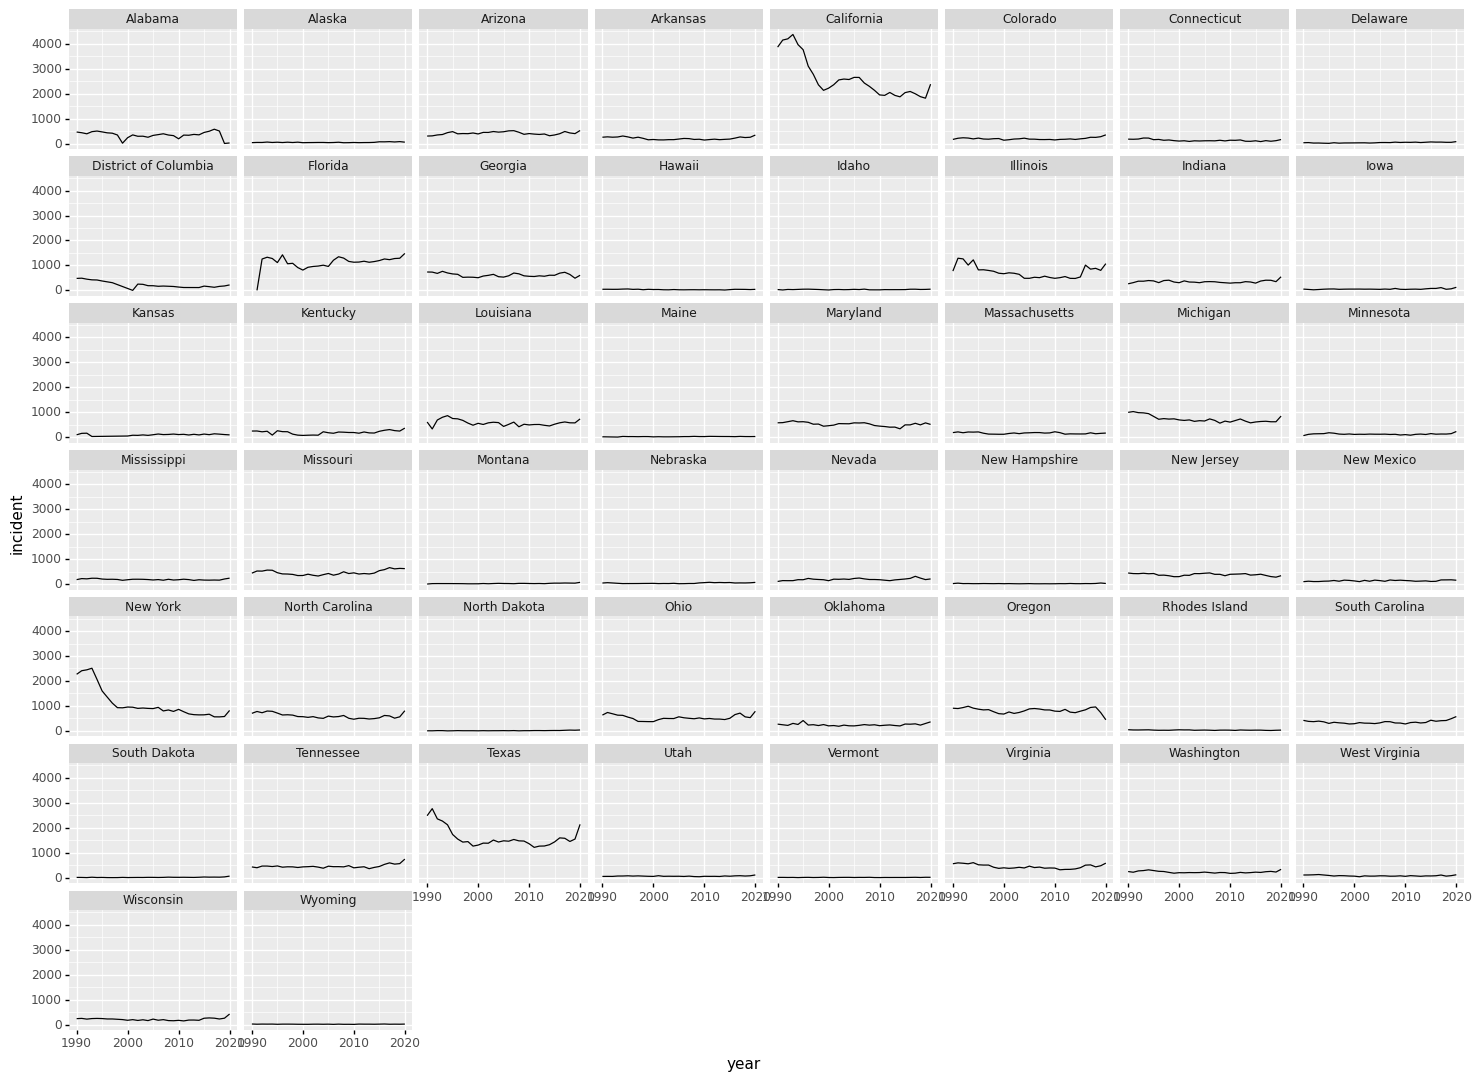

<ggplot: (302823016)>

In [8]:
## the evolution of homicides has been quite regular over time, with a visible decrease 
# in NY and California in absolute numbers
(
    ggplot(to_plot,          
        aes('year', 'incident')) 
        + geom_line()      
        + facet_wrap('state')
        + theme(figure_size=(18, 13))# facet by brand (notice the syntax ~brand)
)

Now we are going to just look into underage homicides, and infanticides (< 1 year-old) <br><b>Alert:</b> We will use the column 'victim age' to keep track of those killings in which the victim was a minor, but doing this we are getting rid of 7,799 victims whose ages were unknown. <b>We'll need to point this out in our final story/viz</b>

In [9]:
underage = df[df.vicage <=17]

In [10]:
underage.shape

(56301, 31)

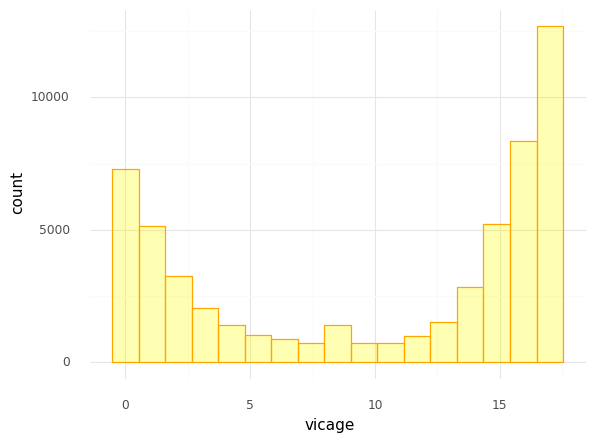

<ggplot: (306010344)>

In [11]:
## most underage homicides happened among those one year old or younger, and over 15 years old
(
    ggplot(underage, aes(x='vicage'))
    + geom_histogram(alpha=.3, bins=17,
                    fill='yellow', 
                    colour='orange',
                    size=0.5,             
                    )
    + theme_minimal()
)

In [12]:
# methond of killing used when the victims are teenagers versus children five years old or younger

In [13]:
age_filter = [15,16,17]
teens = df[df.vicage.isin(age_filter)]

In [14]:
# we group all the kinds of firearm (shotgun, rifle, etc.) into a unique category

In [15]:
replacement_mapping_dict = {
    "Handgun - pistol, revolver, etc": "Firearm",
    "Firearm, type not stated": "Firearm",
    "Rifle": "Firearm",
    "Shotgun": "Firearm",
    "Other gun": "Firearm"
    
}
teens['weapon'] = teens["weapon"].replace(replacement_mapping_dict)

/var/folders/mm/7r7tnzn90cxcfg9kflk_94qc0000gn/T/ipykernel_16957/1986650329.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [16]:
teens.head()

,id,cntyfips,ori,state,agency,agentype,source,solved,year,statename,month,incident,actiontype,homicide,situation,vicage,vicsex,vicrace,vicethnic,offage,offsex,offrace,offethnic,weapon,relationship,circumstance,subcircum,viccount,offcount,filedate,msa
44,199503002AL00401,"Autauga, AL",AL00401,Alabama,Prattville,Municipal police,FBI,Yes,1995,NaN,March,2.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,16.0,Male,Black,Unknown or not reported,20.0,Male,Black,Unknown or not reported,Firearm,Acquaintance,Other arguments,NaN,0,0,42196.0,"Montgomery, AL"
209,199503001AL00508,"Baldwin, AL",AL00508,Alabama,Daphne,Municipal police,FBI,No,1995,NaN,March,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/unknown offender(s),15.0,Male,Black,Unknown or not reported,NaN,NaN,NaN,Unknown or not reported,Firearm,Relationship not determined,Other,NaN,0,0,42196.0,Rural Alabama
221,199512002AL00503,"Baldwin, AL",AL00503,Alabama,Foley,Municipal police,FBI,Yes,1995,NaN,December,2.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,16.0,Male,White,Unknown or not reported,18.0,Male,White,Unknown or not reported,Firearm,Acquaintance,Circumstances undetermined,NaN,0,0,42196.0,Rural Alabama
240,200012002AL00500,"Baldwin, AL",AL00500,Alabama,Baldwin County,Sheriff,FBI,Yes,2000,NaN,December,2.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,16.0,Male,White,Unknown or not reported,45.0,Male,White,Unknown or not reported,"Personal weapons, includes beating",Relationship not determined,Circumstances undetermined,NaN,0,0,41801.0,Rural Alabama
246,200204001AL00504,"Baldwin, AL",AL00504,Alabama,Gulf Shores,Municipal police,FBI,Yes,2002,NaN,April,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,17.0,Male,White,Unknown or not reported,17.0,Male,White,Unknown or not reported,"Personal weapons, includes beating",Relationship not determined,Other arguments,NaN,0,0,32503.0,Rural Alabama


In [17]:
teen_cases = teens.state.value_counts().rename_axis('state').to_frame('total').reset_index()
teen_cases.head(30)

,state,total
0,California,5053
1,Texas,2334
2,Illinois,1897
3,New York,1603
4,Florida,1260
5,Oregon,1052
6,Michigan,1006
7,Louisiana,899
8,Maryland,797
9,Missouri,786


In [18]:
# total number of homicides by state
teen_merged = pd.merge(teens, teen_cases, on=["state"])
teen_merged.tail()

,id,cntyfips,ori,state,agency,agentype,source,solved,year,statename,month,incident,actiontype,homicide,situation,vicage,vicsex,vicrace,vicethnic,offage,offsex,offrace,offethnic,weapon,relationship,circumstance,subcircum,viccount,offcount,filedate,msa,total
26235,199101001WY01500,"Park, WY",WY01500,Wyoming,Park County,Sheriff,FBI,Yes,1991,NaN,January,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,17.0,Male,White,Unknown or not reported,42.0,Male,White,Unknown or not reported,Firearm,Son,Other arguments,NaN,0,0,81491.0,Rural Wyoming,15
26236,200209001WY01700,"Sheridan, WY",WY01700,Wyoming,Sheridan County,Sheriff,FBI,Yes,2002,NaN,September,1.0,Normal update,Manslaughter by negligence,Single victim/single offender,16.0,Male,White,Unknown or not reported,15.0,Male,White,Unknown or not reported,Firearm,Friend,Other negligent handling of gun,NaN,0,0,121802.0,Rural Wyoming,15
26237,199412001WY01901,"Sweetwater, WY",WY01901,Wyoming,Green River,Municipal police,FBI,Yes,1994,NaN,December,1.0,Normal update,Manslaughter by negligence,Single victim/single offender,17.0,Male,White,Unknown or not reported,16.0,Male,White,Unknown or not reported,Firearm,Friend,Other negligent handling of gun,NaN,0,0,21695.0,Rural Wyoming,15
26238,199807001WY01900,"Sweetwater, WY",WY01900,Wyoming,Sweetwater County,Sheriff,FBI,Yes,1998,NaN,July,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/multiple offenders,17.0,Male,White,Unknown or not reported,16.0,Male,White,Unknown or not reported,Knife or cutting instrument,Acquaintance,Circumstances undetermined,NaN,0,1,11499.0,Rural Wyoming,15
26239,201208001WY01900,"Sweetwater, WY",WY01900,Wyoming,Sweetwater County,Sheriff,FBI,Yes,2012,NaN,August,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/multiple offenders,17.0,Male,White,Unknown or not reported,17.0,Male,Asian,Unknown or not reported,"Personal weapons, includes beating",Friend,Other arguments,NaN,0,2,101012.0,Rural Wyoming,15


In [19]:
teen_per_weapon = teens.groupby('state').weapon.value_counts().to_frame('total').reset_index()
teen_per_weapon.head(10)

,state,weapon,total
0,Alabama,Firearm,296
1,Alabama,Knife or cutting instrument,31
2,Alabama,Other or type unknown,17
3,Alabama,"Personal weapons, includes beating",14
4,Alabama,"Blunt object - hammer, club, etc",2
5,Alaska,Firearm,44
6,Alaska,Knife or cutting instrument,3
7,Alaska,Other or type unknown,3
8,Alaska,"Personal weapons, includes beating",2
9,Alaska,Asphyxiation - includes death by gas,1


In [20]:
# total number of homicides by state versus by weapon
df_final = pd.merge(teen_merged, teen_per_weapon, on=["state", "weapon"])
df_final.head()

,id,cntyfips,ori,state,agency,agentype,source,solved,year,statename,month,incident,actiontype,homicide,situation,vicage,vicsex,vicrace,vicethnic,offage,offsex,offrace,offethnic,weapon,relationship,circumstance,subcircum,viccount,offcount,filedate,msa,total_x,total_y
0,199503002AL00401,"Autauga, AL",AL00401,Alabama,Prattville,Municipal police,FBI,Yes,1995,NaN,March,2.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,16.0,Male,Black,Unknown or not reported,20.0,Male,Black,Unknown or not reported,Firearm,Acquaintance,Other arguments,NaN,0,0,42196.0,"Montgomery, AL",360,296
1,199503001AL00508,"Baldwin, AL",AL00508,Alabama,Daphne,Municipal police,FBI,No,1995,NaN,March,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/unknown offender(s),15.0,Male,Black,Unknown or not reported,NaN,NaN,NaN,Unknown or not reported,Firearm,Relationship not determined,Other,NaN,0,0,42196.0,Rural Alabama,360,296
2,199512002AL00503,"Baldwin, AL",AL00503,Alabama,Foley,Municipal police,FBI,Yes,1995,NaN,December,2.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,16.0,Male,White,Unknown or not reported,18.0,Male,White,Unknown or not reported,Firearm,Acquaintance,Circumstances undetermined,NaN,0,0,42196.0,Rural Alabama,360,296
3,199011001AL01100,"Calhoun, AL",AL01100,Alabama,Calhoun County,Sheriff,FBI,Yes,1990,NaN,November,1.0,Normal update,Murder and non-negligent manslaughter,Multiple victims/single offender,16.0,Male,White,Unknown or not reported,22.0,Male,White,Unknown or not reported,Firearm,Friend,Argument over money or property,NaN,1,0,40391.0,"Anniston-Oxford, AL",360,296
4,199407001AL01101,"Calhoun, AL",AL01101,Alabama,Anniston,Municipal police,FBI,Yes,1994,NaN,July,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,17.0,Male,Black,Unknown or not reported,17.0,Male,Black,Unknown or not reported,Firearm,Acquaintance,Other arguments,NaN,0,0,50695.0,"Anniston-Oxford, AL",360,296


In [21]:
df_final['weight'] = (df_final.total_y /df_final.total_x).round(2)

In [23]:
df_final = df_final[['state', 'weapon', 'total_x', 'weight']]
df_final =df_final.drop_duplicates()

In [24]:
df_final.tail(10)

,state,weapon,total_x,weight
25889,Wisconsin,Firearm,362,0.82
26185,Wisconsin,Other or type unknown,362,0.07
26211,Wisconsin,"Personal weapons, includes beating",362,0.02
26217,Wisconsin,"Narcotics or drugs, sleeping pills",362,0.01
26219,Wisconsin,"Blunt object - hammer, club, etc",362,0.01
26224,Wisconsin,Asphyxiation - includes death by gas,362,0.00
26225,Wyoming,Firearm,15,0.67
26235,Wyoming,Other or type unknown,15,0.07
26236,Wyoming,Knife or cutting instrument,15,0.13
26238,Wyoming,"Personal weapons, includes beating",15,0.13


In [25]:
df_final.to_csv('teens_data.csv', index=False)

In [26]:
## We do the same but for child homicides

In [27]:
df = df[df.vicage <= 5]

In [28]:
df.weapon.value_counts()

Personal weapons, includes beating      8978
Other or type unknown                   4136
Handgun - pistol, revolver, etc         1528
Blunt object - hammer, club, etc        1302
Asphyxiation - includes death by gas    1034
Knife or cutting instrument              670
Fire                                     640
Drowning                                 452
Firearm, type not stated                 406
Narcotics or drugs, sleeping pills       326
Rifle                                    205
Strangulation - hanging                  187
Shotgun                                  176
Poison - does not include gas             75
Explosives                                46
Other gun                                 27
Pushed or thrown out window               25
Name: weapon, dtype: int64

In [29]:
replacement_mapping_dict = {
    "Handgun - pistol, revolver, etc": "Firearm",
    "Firearm, type not stated": "Firearm",
    "Rifle": "Firearm",
    "Shotgun": "Firearm",
    "Other gun": "Firearm"
    
}
df['weapon'] = df["weapon"].replace(replacement_mapping_dict)


In [30]:
df.weapon.value_counts()

Personal weapons, includes beating      8978
Other or type unknown                   4136
Firearm                                 2342
Blunt object - hammer, club, etc        1302
Asphyxiation - includes death by gas    1034
Knife or cutting instrument              670
Fire                                     640
Drowning                                 452
Narcotics or drugs, sleeping pills       326
Strangulation - hanging                  187
Poison - does not include gas             75
Explosives                                46
Pushed or thrown out window               25
Name: weapon, dtype: int64

In [31]:
total_cases = df.state.value_counts().rename_axis('state').to_frame('total').reset_index()
total_cases.head(10)


,state,total
0,California,2506
1,Texas,1941
2,Florida,1462
3,New York,1158
4,Oregon,993
5,Michigan,719
6,Ohio,710
7,Georgia,658
8,Illinois,611
9,Missouri,601


In [32]:
merged = pd.merge(df, total_cases, on=["state"])

In [33]:
total_per_weapon = df.groupby('state').weapon.value_counts().to_frame('per_weapon').reset_index()
total_per_weapon.tail(10)

,state,weapon,per_weapon
486,Wyoming,"Personal weapons, includes beating",30
487,Wyoming,Asphyxiation - includes death by gas,8
488,Wyoming,Firearm,4
489,Wyoming,Other or type unknown,4
490,Wyoming,Drowning,2
491,Wyoming,"Narcotics or drugs, sleeping pills",2
492,Wyoming,"Blunt object - hammer, club, etc",1
493,Wyoming,Knife or cutting instrument,1
494,Wyoming,Pushed or thrown out window,1
495,Wyoming,Strangulation - hanging,1


In [34]:
merged_final = pd.merge(merged, total_per_weapon, on=["state", "weapon"])

In [35]:
merged_final.head()

,id,cntyfips,ori,state,agency,agentype,source,solved,year,statename,month,incident,actiontype,homicide,situation,vicage,vicsex,vicrace,vicethnic,offage,offsex,offrace,offethnic,weapon,relationship,circumstance,subcircum,viccount,offcount,filedate,msa,total,per_weapon
0,199511001AL00508,"Baldwin, AL",AL00508,Alabama,Daphne,Municipal police,FBI,No,1995,NaN,November,1.0,Normal update,Murder and non-negligent manslaughter,Single victim/unknown offender(s),3.0,Female,Black,Unknown or not reported,NaN,NaN,NaN,Unknown or not reported,"Personal weapons, includes beating",Relationship not determined,Other,NaN,0,0,42196.0,Rural Alabama,201,86
1,201405212AL00509,"Baldwin, AL",AL00509,Alabama,Summerdale,Municipal police,MAP,Yes,2014,NaN,May,212.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,1.0,Male,White,Unknown or not reported,NaN,NaN,NaN,Unknown or not reported,"Personal weapons, includes beating",Son,Other - not specified,NaN,0,0,92517.0,Rural Alabama,201,86
2,199612002AL01101,"Calhoun, AL",AL01101,Alabama,Anniston,Municipal police,FBI,Yes,1996,NaN,December,2.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,3.0,Female,Black,Unknown or not reported,20.0,Female,Black,Unknown or not reported,"Personal weapons, includes beating",Stepdaughter,Other,NaN,0,0,42597.0,"Anniston-Oxford, AL",201,86
3,200105002AL01101,"Calhoun, AL",AL01101,Alabama,Anniston,Municipal police,FBI,Yes,2001,NaN,May,2.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,0.0,Female,Black,Unknown or not reported,16.0,Female,Black,Unknown or not reported,"Personal weapons, includes beating",Daughter,Other,NaN,0,0,32902.0,"Anniston-Oxford, AL",201,86
4,201305203AL01105,"Calhoun, AL",AL01105,Alabama,Oxford,Municipal police,MAP,Yes,2013,NaN,May,203.0,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,2.0,Male,White,Unknown or not reported,23.0,Male,Black,Unknown or not reported,"Personal weapons, includes beating",Other family,Other - not specified,NaN,0,0,92517.0,"Anniston-Oxford, AL",201,86


In [36]:
merged_final = merged_final[['state', 'weapon', 'per_weapon', 'total']]

In [37]:
merged_final['weight'] = merged_final.per_weapon / merged_final.total.round(2)

In [38]:
# we get rid of duplicated rows
merged_final = merged_final.drop_duplicates()

In [39]:
merged_final.to_csv('final_plot.csv', index=False)
merged_final.head(10)

,state,weapon,per_weapon,total,weight
0,Alabama,"Personal weapons, includes beating",86,201,0.427861
86,Alabama,Firearm,50,201,0.248756
136,Alabama,Other or type unknown,45,201,0.223881
181,Alabama,Fire,9,201,0.044776
190,Alabama,Knife or cutting instrument,4,201,0.019900
194,Alabama,"Blunt object - hammer, club, etc",4,201,0.019900
198,Alabama,Drowning,2,201,0.009950
200,Alabama,Asphyxiation - includes death by gas,1,201,0.004975
201,Alaska,"Personal weapons, includes beating",32,96,0.333333
233,Alaska,Drowning,4,96,0.041667


In [43]:
merged_final.to_csv('final_children.csv', index=False)